In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import sys
sys.path.append('../')

from src.algo.pg import PGAgent
from src.envs import PendubotEnvPartialNorm

In [7]:
# rnn_path = '../data/iqcrnn/pendubot_partial_norm_rnn_10-05-2022_12-56-08/2/'

rnn_path = '../data/iqcrnn/pendubot_partial_norm_rnn_proj_10-05-2022_13-26-37/2/'


prefs = ['best_', 'e000_', 'e100_', 'e200_', 'e300_', 'e400_', 'e500_']

agents = {
    px[:-1]: PGAgent.load(rnn_path + px)
    for px in prefs
}
agents

{'best': <src.algo.pg.PGAgent at 0x13d8b0dd8>,
 'e000': <src.algo.pg.PGAgent at 0x13d985a20>,
 'e100': <src.algo.pg.PGAgent at 0x13db2d710>,
 'e200': <src.algo.pg.PGAgent at 0x13db1f0f0>,
 'e300': <src.algo.pg.PGAgent at 0x13db08470>,
 'e400': <src.algo.pg.PGAgent at 0x13db08780>,
 'e500': <src.algo.pg.PGAgent at 0x13db58e48>}

In [8]:
env = PendubotEnvPartialNorm()
env

In [9]:
def get_traj_plot(agent, horizon=200, save_path=None):
    points = [[(-1)**((i//8)%2)/10, (-1)**((i//4)%2)/10, (-1)**((i//2)%2)/10, (-1)**(i%2)/10]for i in range(2**4)]    
    
    fig, axs = plt.subplots(4, 1, dpi=300, figsize=(3.5, 2.4))
    axs[0].set_xticks([])
    axs[1].set_xticks([])
    axs[2].set_xticks([])
    axs[0].set_ylim(-1, 1)
    axs[0].set_xlim(0, 200)
    axs[0].set_ylabel("$x_1$")
    axs[1].set_ylim(-8, 8)
    axs[1].set_xlim(0, 200)
    axs[1].set_ylabel("$x_2$")
    axs[2].set_ylim(-1.5, 1.5)
    axs[2].set_xlim(0, 200)
    axs[2].set_ylabel("$x_3$")
    axs[3].set_ylim(-15, 15)
    axs[3].set_xlim(0, 200)
    axs[3].set_ylabel("$x_4$")

    axs[3].set_xlabel("Time Steps")

    c = 'tab:blue' if 'proj' in rnn_path else 'tab:orange'
    for px in tqdm(points):
        states = agent.sample_trajectory(env, False, init_state=px, horizon=horizon, sample=False)['state']
        axs[0].plot(states[:, 0], color=c)
        axs[1].plot(states[:, 1], color=c)
        axs[2].plot(states[:, 2], color=c)
        axs[3].plot(states[:, 3], color=c)

    if save_path is None:
        plt.show()
    else:
        plt.tight_layout()
        plt.savefig(save_path)

100%|██████████| 16/16 [00:02<00:00,  6.97it/s]


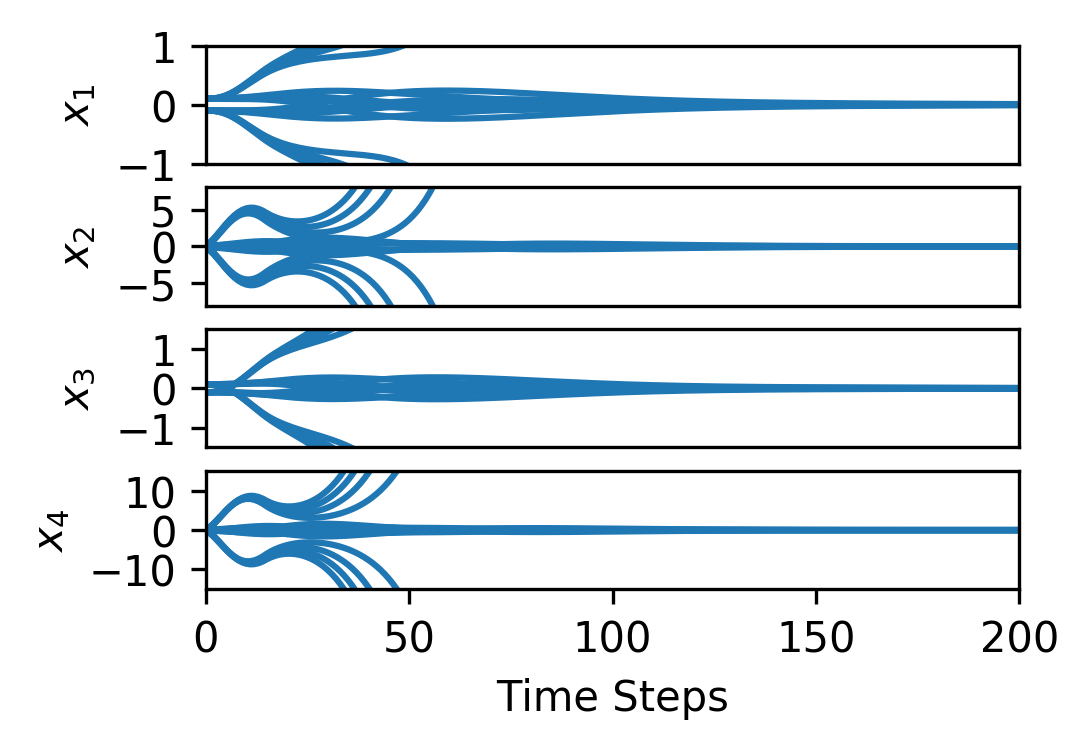

In [10]:
get_traj_plot(agents['e500'])

100%|██████████| 16/16 [00:02<00:00,  6.80it/s]


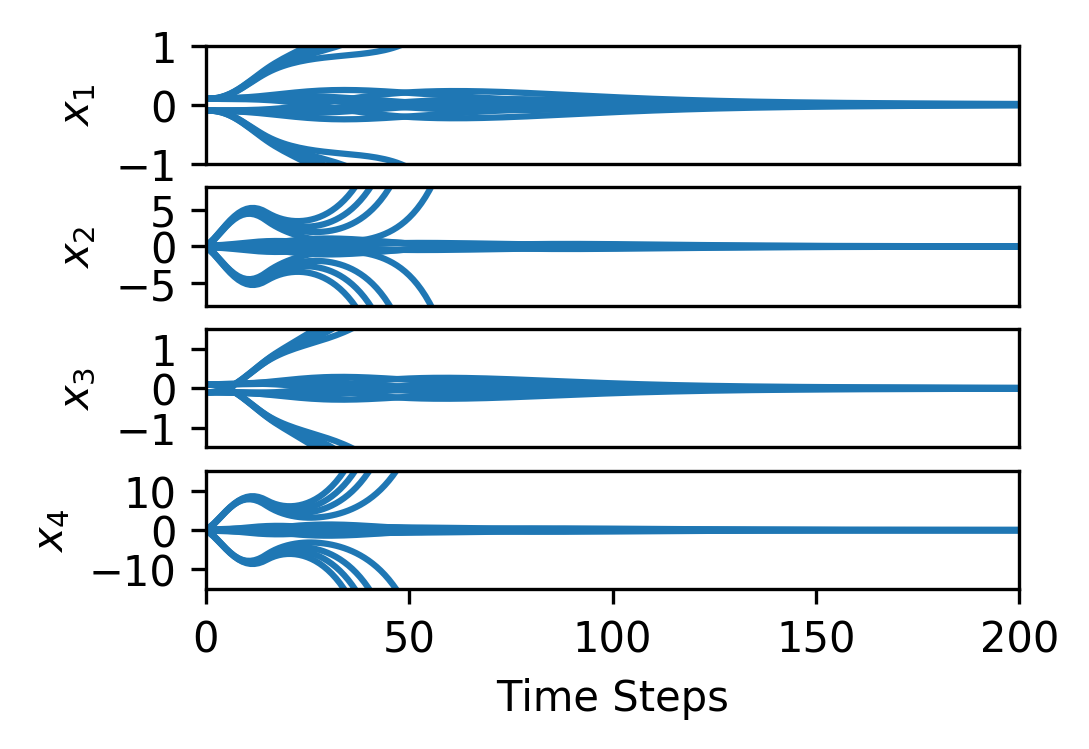

In [11]:
get_traj_plot(agents['best'])